In [1]:
from lcls_tools.common.measurements.emittance_measurement import QuadScanEmittance
from lcls_tools.common.measurements.screen_profile import ScreenBeamProfileMeasurement
from lcls_tools.common.devices.reader import create_magnet, create_screen
from lcls_tools.common.frontend.plotting.image import plot_image_projection_fit
import epics
import matplotlib.pyplot as plt
import numpy as np

In [2]:
magnet = create_magnet('DL1', 'QE02')

screen = create_screen('DL1', 'OTR2')
print(screen)
print(magnet.controls_information.PVs)
bmax = magnet.bmax
bmin = magnet.bmin
print(screen.controls_information.PVs)
print(bmax)
scan_values = np.linspace(bmin,bmax,10) 

rmat = np.array([[[1, 2.26],
                  [0, 1]],
                 [[1, 2.26],
                  [0, 1]]])
design_twiss = {'beta_x': 1.113081026,
                'beta_y': 1.113021659,
                'alpha_x': -6.89403587e-2,
                'alpha_y': -7.029489754e-2}


name='OTR2' controls_information=ScreenControlInformation(control_name='OTRS:IN20:571', PVs=ScreenPVSet(image=<PV 'OTRS:IN20:571:Image:ArrayData': not connected>, n_col=<PV 'OTRS:IN20:571:Image:ArraySize1_RBV': not connected>, n_row=<PV 'OTRS:IN20:571:Image:ArraySize0_RBV': not connected>, n_bits=<PV 'OTRS:IN20:571:N_OF_BITS': not connected>, resolution=<PV 'OTRS:IN20:571:RESOLUTION': not connected>)) metadata=Metadata(area='DL1', beam_path=['CU_ALINE', 'CU_HTXI', 'CU_HXR', 'CU_HXTES', 'CU_SFTH', 'CU_SPEC', 'CU_SXR'], sum_l_meters=14.241, type='PROF', safe_level=None, read_tolerance=None)
bctrl=<PV 'QUAD:IN20:441:BCTRL', count=1, type=time_double, access=read/write> bact=<PV 'QUAD:IN20:441:BACT', count=1, type=time_double, access=read/write> bdes=<PV 'QUAD:IN20:441:BDES', count=1, type=time_double, access=read/write> bcon=<PV 'QUAD:IN20:441:BCON', count=1, type=time_double, access=read/write> ctrl=<PV 'QUAD:IN20:441:CTRL', count=1, type=time_enum, access=read/write> bmin=<PV 'QUAD:IN20

In [3]:
beam_measurement = ScreenBeamProfileMeasurement(device = screen)
quadscanemit = QuadScanEmittance(magnet=magnet, rmat = rmat, design_twiss=design_twiss,  energy= 1e6, scan_values= scan_values, beamsize_measurement= beam_measurement)

In [9]:
screen.n_rows
screen.n_columns
screen.image

ChannelAccessGetFailure: Get failed; status code: 142

In [ ]:
res = beam_measurement.measure()

raw_images=array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]]) processed_images=array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]]) rms_sizes=array([[6.02672352, 8.03563135]]) centroids=array([[299.50565, 399.50881]]) total_intensities=array([100000.]) metadata={'name': 'beam_profile', 'save_data': True, 'save_location': None, 'device': {'name': 'OTR2', 'controls_information': {'control_name': 'OTRS:IN20:571', 'PVs': {'image': <PV 'OTRS:IN20:571:Image:ArrayData', count=480000/480000, type=time_double, access=read/write>, 'n_col': <PV 'OTRS:IN20:571:Image:ArraySize1_RBV', count=1, type=time_long, acc

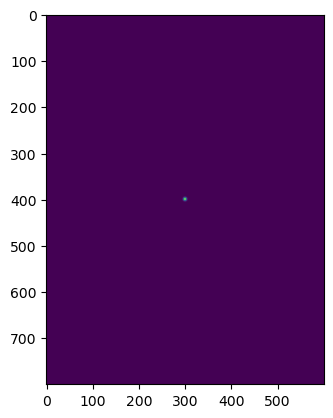

In [6]:

# i don't think beam_meaurement.measure() is working in particular the image processing.
img = res.processed_images[0]
plt.imshow(img)
print(res)
#plot_image_projection_fit(res)


(<Figure size 400x900 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

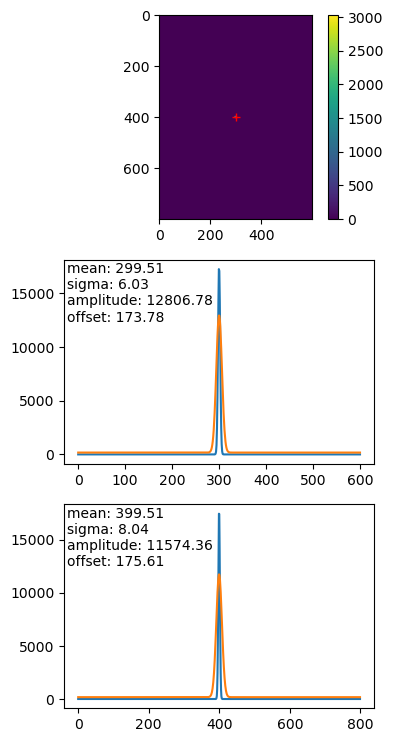

In [7]:
res2 = beam_measurement.beam_fit.fit_image(img)
plot_image_projection_fit(res2)

600


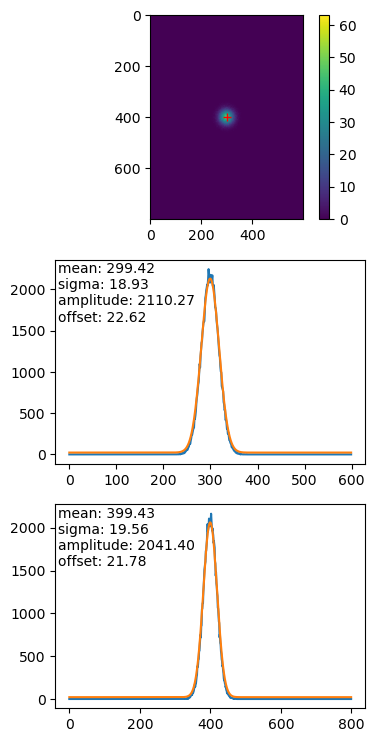

In [8]:
epics.caput('QUAD:IN20:425:BCTRL', 15)
epics.caput('QUAD:IN20:441:BCTRL', 3)
epics.caput('QUAD:IN20:511:BCTRL', -1.5)
epics.caput('QUAD:IN20:525:BCTRL', -18)
res = beam_measurement.measure()
img = res.processed_images[0]
fitted = beam_measurement.beam_fit.fit_image(img)
plot_image_projection_fit(fitted)
nrow = epics.caget('OTRS:IN20:571:Image:ArraySize0_RBV')
print(nrow)
ncol= epics.caget('OTRS:IN20:571:Image:ArraySize1_RBV')
flat_image=epics.caget('OTRS:IN20:571:Image:ArrayData')
image = np.array(flat_image).reshape(ncol,nrow)


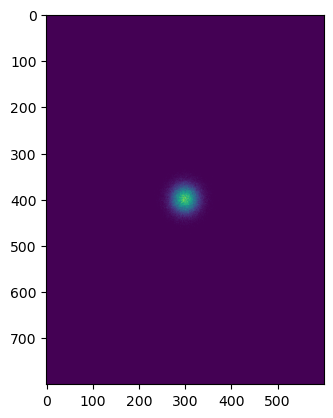

In [9]:
plt.imshow(image)


In [10]:
res = quadscanemit.measure()

In [11]:
print(res)

quadrupole_focusing_strengths=[array([-5551.71218519, -4317.99836626, -3084.28454733, -1850.5707284 ,
        -616.85690947,   616.85690947,  1850.5707284 ,  3084.28454733,
        4317.99836626,  5551.71218519]), array([ 5551.71218519,  4317.99836626,  3084.28454733,  1850.5707284 ,
         616.85690947,  -616.85690947, -1850.5707284 , -3084.28454733,
       -4317.99836626, -5551.71218519])] quadrupole_pv_values=[array([-20.        , -15.55555556, -11.11111111,  -6.66666667,
        -2.22222222,   2.22222222,   6.66666667,  11.11111111,
        15.55555556,  20.        ]), array([-20.        , -15.55555556, -11.11111111,  -6.66666667,
        -2.22222222,   2.22222222,   6.66666667,  11.11111111,
        15.55555556,  20.        ])] emittance=array([[1.92348545e-11],
       [1.07837695e-10]]) bmag=[array([1.03095409e+10, 1.20219279e+09, 9.57887621e+07, 3.88194851e+06,
       2.61526784e+04, 1.07414378e+02, 1.37333728e+03, 2.05221962e+02,
       1.67860015e+03, 4.00647097e+03]), array

(<Figure size 400x600 with 2 Axes>,
 array([<Axes: xlabel='Quadrupole Strength [T/m]', ylabel='Beam size [um]'>,
        <Axes: xlabel='Quadrupole Strength [T/m]', ylabel='bmag'>],
       dtype=object))

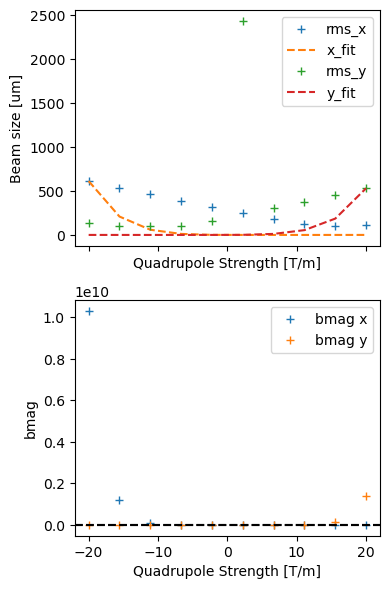

In [12]:
from lcls_tools.common.frontend.plotting.emittance import plot_quad_scan_result
plot_quad_scan_result(res)